In [7]:
import pandas as pd
import numpy as np
train_data=pd.read_csv(r'C:\Users\garga\3D Objects\ELL784 Assn\Assn1\train.csv')

train_data.head()

,x1,x2
0,-1.622420,726.595690
1,1.424165,-276.584355
2,0.709026,4.205381
3,1.175814,-5.317791
4,1.365642,-172.438086


In [8]:
test_data=pd.read_csv(r'C:\Users\garga\3D Objects\ELL784 Assn\Assn1\test.csv',header=None)

test_data.head()

,0,1
0,-1.694579,1038.386580
1,-0.850615,5.154652
2,0.297578,15.072852
3,0.801726,47.619410
4,-0.270662,30.490240


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_data=scaler.fit_transform(train_data)
train_data=pd.DataFrame(train_data)
test_data=scaler.fit_transform(test_data)
test_data=pd.DataFrame(test_data)

In [10]:
x_train=train_data.iloc[:,0]
y_train=train_data.iloc[:,1]

In [11]:
x_test=test_data.iloc[:,0]
y_test=test_data.iloc[:,1]

Text(0.5, 1.0, 'Training data')

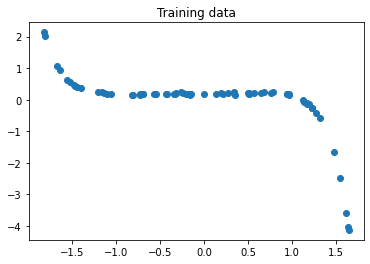

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.title("Training data")

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

### Curve fitting using first 20 training points

In [14]:
x_20=x_train[0:20]
y_20=y_train[0:20]
sorted_x_20=np.sort(x_20)
poly1d=PolynomialFeatures(degree=1)
poly2d=PolynomialFeatures(degree=2)
poly3d=PolynomialFeatures(degree=3)
poly4d=PolynomialFeatures(degree=4)
X1 = poly1d.fit_transform(np.array(sorted_x_20).reshape(-1, 1))
X2 = poly2d.fit_transform(np.array(sorted_x_20).reshape(-1, 1))
X3 = poly3d.fit_transform(np.array(sorted_x_20).reshape(-1, 1))
X4 = poly4d.fit_transform(np.array(sorted_x_20).reshape(-1, 1))
linear_reg_1d = LinearRegression()
linear_reg_2d = LinearRegression()
linear_reg_3d = LinearRegression()
linear_reg_4d = LinearRegression()
f1=linear_reg_1d.fit(X1, y_20)
f2=linear_reg_2d.fit(X2, y_20)
f3=linear_reg_3d.fit(X3, y_20)
f4=linear_reg_4d.fit(X4, y_20)
print(type(poly1d))

<class 'sklearn.preprocessing._data.PolynomialFeatures'>


Coefficients: [0.00809543]
Intercept: 0.02073207055136819
Error: 15.894074938399957


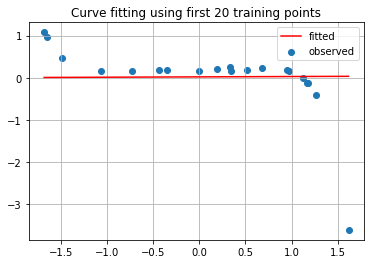

Coefficients: [0.04555082 0.18826149]
Intercept: -0.17988742102638078
Error: 15.321796019448637


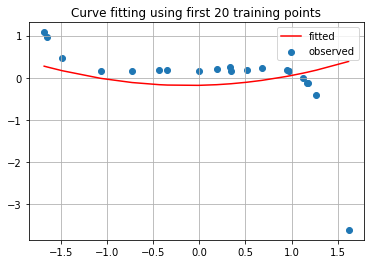

Coefficients: [ 0.60526705  0.12935859 -0.30062665]
Intercept: -0.21602348856359943
Error: 14.313493770990496


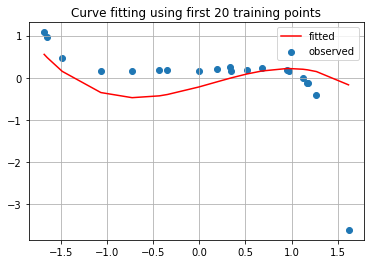

Coefficients: [ 0.61948455  0.00508414 -0.29929178  0.04806152]
Intercept: -0.18160662662909163
Error: 14.293991287550096


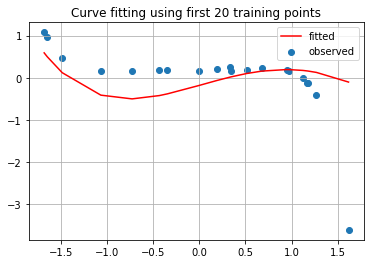

In [15]:
def regression_line(model, coefs, intercept, X_):
    print('Coefficients: {}'.format(coefs))
    print('Intercept: {}'.format(intercept))
    y_pred=model.predict(X_)
    print('Error: {}'.format(np.linalg.norm(y_20 - y_pred) ** 2))
    
    #df=pd.DataFrame(X_,y_pred)
    #sorted_df=df.sort_values(by=df.iloc[:,0])

    plt.scatter(x_20, y_20, label="observed")
    plt.plot(sorted_x_20,model.predict(X_), c='red', label="fitted")
    plt.title('Curve fitting using first 20 training points')
    plt.grid()
    plt.legend()
    plt.show()
    
regression_line(linear_reg_1d, linear_reg_1d.coef_[1:], linear_reg_1d.intercept_, X1)
regression_line(linear_reg_2d, linear_reg_2d.coef_[1:], linear_reg_2d.intercept_, X2)
regression_line(linear_reg_3d, linear_reg_3d.coef_[1:], linear_reg_3d.intercept_, X3)
regression_line(linear_reg_4d, linear_reg_4d.coef_[1:], linear_reg_4d.intercept_, X4)

### Curve fitting using whole training data

In [16]:
sorted_x_train=np.sort(x_train)
poly1d=PolynomialFeatures(degree=1)
poly2d=PolynomialFeatures(degree=2)
poly3d=PolynomialFeatures(degree=3)
poly4d=PolynomialFeatures(degree=4)
X1 = poly1d.fit_transform(np.array(sorted_x_train).reshape(-1, 1))
X2 = poly2d.fit_transform(np.array(sorted_x_train).reshape(-1, 1))
X3 = poly3d.fit_transform(np.array(sorted_x_train).reshape(-1, 1))
X4 = poly4d.fit_transform(np.array(sorted_x_train).reshape(-1, 1))
linear_reg_1d = LinearRegression()
linear_reg_2d = LinearRegression()
linear_reg_3d = LinearRegression()
linear_reg_4d = LinearRegression()
f1=linear_reg_1d.fit(X1, y_train)
f2=linear_reg_2d.fit(X2, y_train)
f3=linear_reg_3d.fit(X3, y_train)
f4=linear_reg_4d.fit(X4, y_train)


Coefficients: [-0.04141622]
Intercept: 1.7412995939646748e-17
Error: 69.8799287564149


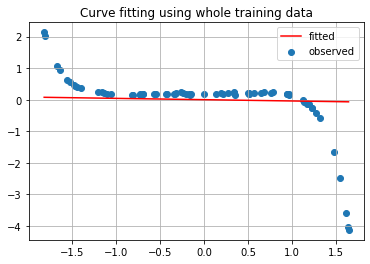

Coefficients: [-0.04462827 -0.02322818]
Intercept: 0.023228177874840914
Error: 69.84701846276073


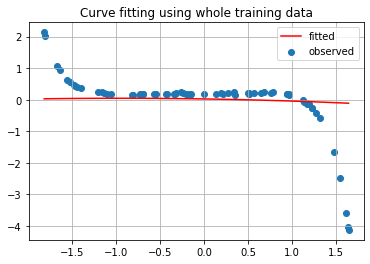

Coefficients: [-0.08387366 -0.01862398  0.02109611]
Intercept: 0.02154120321500595
Error: 69.82549994541566


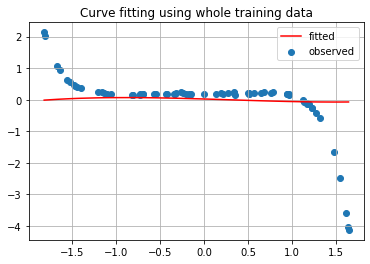

Coefficients: [-0.11357734 -0.44499886  0.05575668  0.16068019]
Intercept: 0.14894413463739453
Error: 68.79813832606834


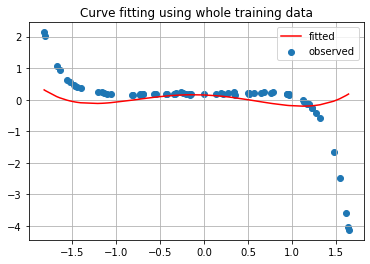

In [17]:
def regression_line(model, coefs, intercept, X_):
    print('Coefficients: {}'.format(coefs))
    print('Intercept: {}'.format(intercept))
    y_pred=model.predict(X_)
    print('Error: {}'.format(np.linalg.norm(y_train - y_pred) ** 2))

    plt.scatter(x_train, y_train, label="observed")
    plt.plot(sorted_x_train,model.predict(X_), c='red', label="fitted")
    plt.title('Curve fitting using whole training data')
    plt.grid()
    plt.legend()
    plt.show()
    
regression_line(linear_reg_1d, linear_reg_1d.coef_[1:], linear_reg_1d.intercept_, X1)
regression_line(linear_reg_2d, linear_reg_2d.coef_[1:], linear_reg_2d.intercept_, X2)
regression_line(linear_reg_3d, linear_reg_3d.coef_[1:], linear_reg_3d.intercept_, X3)
regression_line(linear_reg_4d, linear_reg_4d.coef_[1:], linear_reg_4d.intercept_, X4)

### Prediction using test data

Text(0.5, 1.0, 'TEST DATA')

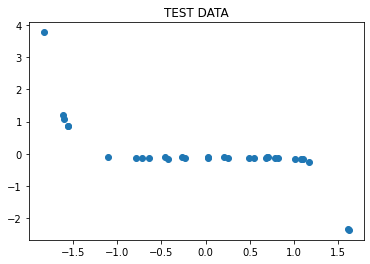

In [29]:
plt.scatter(x_test,y_test)
plt.title('TEST DATA')

In [35]:
test_data.shape

(30, 2)

[-0.62386009]
3.6631812078359883e-17
1.2437354160926684


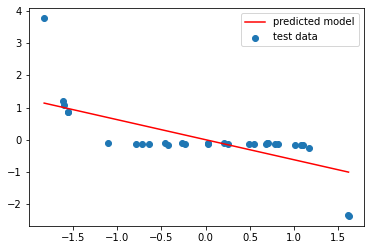

In [34]:
from sklearn.metrics import mean_squared_error

M=1
poly=PolynomialFeatures(degree=M)
X = poly.fit_transform(np.array(x_train).reshape(-1, 1))
X_test = poly.transform(np.array(np.sort(x_test)).reshape(-1, 1))


linear_reg = LinearRegression()
f=linear_reg.fit(X, y_train)
coef=linear_reg.coef_[1:]
intercept=linear_reg.intercept_
print(coef)
print(intercept)

y_pred=linear_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))


plt.scatter(x_test,y_test,label='test data')
plt.plot(np.sort(x_test),y_pred,c='red',label='predicted model')
plt.legend()
plt.show()

[-0.67090359 -0.34019849]
0.34019848749846165
1.355522354214204


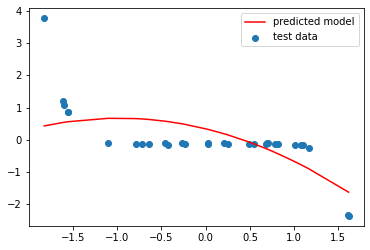

In [30]:
from sklearn.metrics import mean_squared_error
M=2
poly=PolynomialFeatures(degree=M)
X = poly.fit_transform(np.array(x_train).reshape(-1, 1))
X_test = poly.transform(np.array(np.sort(x_test)).reshape(-1, 1))


linear_reg = LinearRegression()
f=linear_reg.fit(X, y_train)
coef=linear_reg.coef_[1:]
intercept=linear_reg.intercept_
print(coef)
print(intercept)

y_pred=linear_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))


plt.scatter(x_test,y_test,label='test data')
plt.plot(np.sort(x_test),y_pred,c='red',label='predicted model')
plt.legend()
plt.show()


[ 0.72610906 -0.50409349 -0.7509554 ]
0.4002494858168671
1.6201598306258196


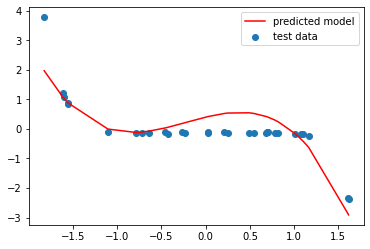

In [31]:
M=3
poly=PolynomialFeatures(degree=M)
X = poly.fit_transform(np.array(x_train).reshape(-1, 1))
X_test = poly.transform(np.array(np.sort(x_test)).reshape(-1, 1))


linear_reg = LinearRegression()
f=linear_reg.fit(X, y_train)
coef=linear_reg.coef_[1:]
intercept=linear_reg.intercept_
print(coef)
print(intercept)

y_pred=linear_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))


plt.scatter(x_test,y_test,label='test data')
plt.plot(np.sort(x_test),y_pred,c='red',label='predicted model')
plt.legend()
plt.show()


[ 0.77373851  0.1795931  -0.80653317 -0.25764861]
0.19596053900854615
1.6598461734304077


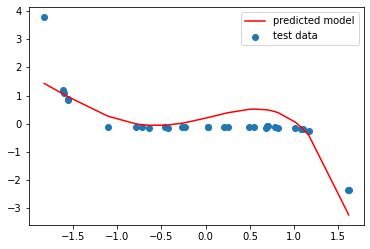

In [33]:
M=4
poly=PolynomialFeatures(degree=M)
X = poly.fit_transform(np.array(x_train).reshape(-1, 1))
X_test = poly.transform(np.array(np.sort(x_test)).reshape(-1, 1))


linear_reg = LinearRegression()
f=linear_reg.fit(X, y_train)
coef=linear_reg.coef_[1:]
intercept=linear_reg.intercept_
print(coef)
print(intercept)

y_pred=linear_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))


plt.scatter(x_test,y_test,label='test data')
plt.plot(np.sort(x_test),y_pred,c='red',label='predicted model')
plt.legend()
plt.show()

[-0.13918181  0.4589999   0.5622787  -0.39404204 -0.39687846]
0.1295765738471899
1.7003403209287287


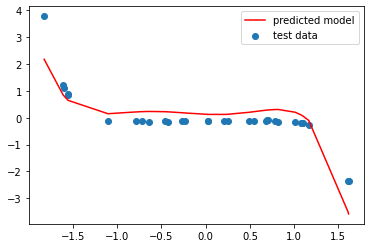

In [32]:
M=5
poly=PolynomialFeatures(degree=M)
X = poly.fit_transform(np.array(x_train).reshape(-1, 1))
X_test = poly.transform(np.array(np.sort(x_test)).reshape(-1, 1))


linear_reg = LinearRegression()
f=linear_reg.fit(X, y_train)
coef=linear_reg.coef_[1:]
intercept=linear_reg.intercept_
print(coef)
print(intercept)

y_pred=linear_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))


plt.scatter(x_test,y_test,label='test data')
plt.plot(np.sort(x_test),y_pred,c='red',label='predicted model')
plt.legend()
plt.show()
